## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [2]:
print("No of samples in training and test data:\n Training : {} \n Test: {}".format(x_train.shape[0],x_test.shape[0]))

No of samples in training and test data:
 Training : 60000 
 Test: 10000


### Find dimensions of an image in the dataset

In [3]:
print("Dimensions of the Images are {} X {}.".format(x_train.shape[1], x_train.shape[2]))

Dimensions of the Images are 28 X 28.


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(
    y_train,
    num_classes=10,
    dtype='float64'
)

In [5]:
y_train.shape

(60000, 10)

In [0]:
y_test = to_categorical(
    y_test,
    num_classes=10,
    dtype='float32'
)

In [19]:
y_test.shape

(10000, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
X_train = x_train/255
X_test =  x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [22]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [0]:
#Clear any previous model from memory
import tensorflow
tensorflow.keras.backend.clear_session()

In [0]:
from tensorflow.keras import datasets, layers, models

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(w, h, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [39]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[earlystopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3712 - acc: 0.8679 - val_loss: 0.2841 - val_acc: 0.8948
Epoch 2/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2300 - acc: 0.9157 - val_loss: 0.2785 - val_acc: 0.8994
Epoch 3/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1679 - acc: 0.9376 - val_loss: 0.2546 - val_acc: 0.9145
Epoch 4/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1155 - acc: 0.9567 - val_loss: 0.2732 - val_acc: 0.9141
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0774 - acc: 0.9714 - val_loss: 0.3272 - val_acc: 0.9125
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0526 - acc: 0.9807 - val_loss: 0.3402 - val_acc: 0.9159
Epoch 7/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0355 - acc: 0.9871 - val_l

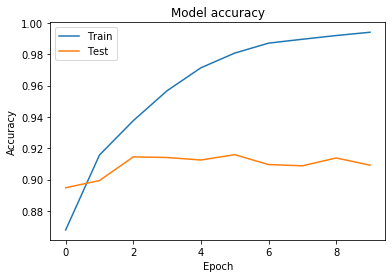

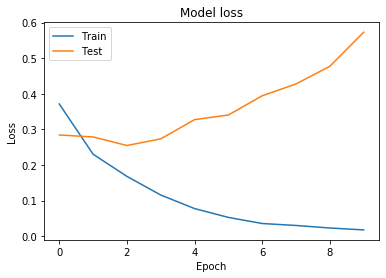

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(w, h, 1)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu')) 
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(.25)) 
model1.add(layers.Flatten())
model1.add(layers.Dense(128,activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = model1.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test), callbacks=[earlystopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3912 - acc: 0.8593 - val_loss: 0.3092 - val_acc: 0.8870
Epoch 2/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2560 - acc: 0.9058 - val_loss: 0.2571 - val_acc: 0.9045
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2107 - acc: 0.9219 - val_loss: 0.2513 - val_acc: 0.9100
Epoch 4/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1769 - acc: 0.9345 - val_loss: 0.2325 - val_acc: 0.9144
Epoch 5/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1499 - acc: 0.9444 - val_loss: 0.2369 - val_acc: 0.9164
Epoch 6/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.1267 - acc: 0.9525 - val_loss: 0.2256 - val_acc: 0.9210
Epoch 7/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1102 - acc: 0.9581 - val_l

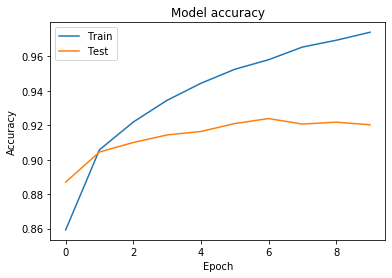

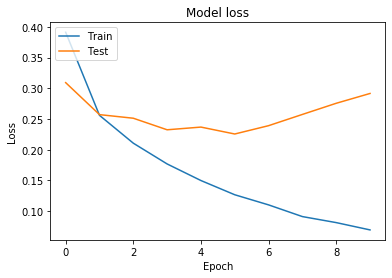

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.2,
    horizontal_flip=False)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


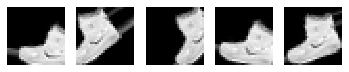

In [46]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [48]:
history = model.fit_generator(datagen.flow(X_train, y_train), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
  16/1875 [..............................] - ETA: 20s - loss: 3.8779 - acc: 0.1641

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1875/1875 [==============================] - 21s 11ms/step - loss: 1.3461 - acc: 0.5106 - val_loss: 0.7142 - val_acc: 0.7479
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8383 - acc: 0.6914 - val_loss: 0.7443 - val_acc: 0.7434
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7389 - acc: 0.7268 - val_loss: 0.6102 - val_acc: 0.7799
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6817 - acc: 0.7476 - val_loss: 0.5715 - val_acc: 0.8033
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6504 - acc: 0.7580 - val_loss: 0.5371 - val_acc: 0.8161
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6219 - acc: 0.7697 - val_loss: 0.5124 - val_acc: 0.8220
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5996 - acc: 0.7783 - val_loss: 0.4892 - val_acc: 0.8307
Epoch 8/10
1875/1875 [==============================] - 21s

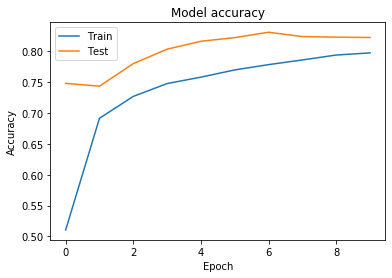

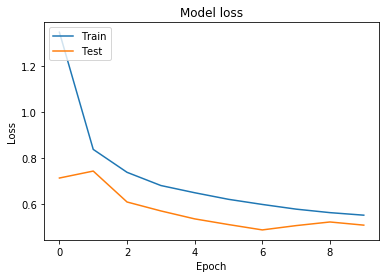

In [49]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [51]:
history = model1.fit_generator(datagen.flow(X_train, y_train),steps_per_epoch=len(x_train) / 32, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
  19/1875 [..............................] - ETA: 18s - loss: 3.2048 - acc: 0.1908

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1875/1875 [==============================] - 20s 11ms/step - loss: 1.0964 - acc: 0.6016 - val_loss: 0.6026 - val_acc: 0.7698
Epoch 2/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7749 - acc: 0.7142 - val_loss: 0.5520 - val_acc: 0.7982
Epoch 3/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6956 - acc: 0.7425 - val_loss: 0.5347 - val_acc: 0.8035
Epoch 4/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6469 - acc: 0.7618 - val_loss: 0.4672 - val_acc: 0.8312
Epoch 5/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6162 - acc: 0.7735 - val_loss: 0.4514 - val_acc: 0.8393
Epoch 6/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5876 - acc: 0.7838 - val_loss: 0.5289 - val_acc: 0.8091
Epoch 7/25
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5672 - acc: 0.7900 - val_loss: 0.4661 - val_acc: 0.8282
Epoch 8/25
1875/1875 [==============================] - 20s

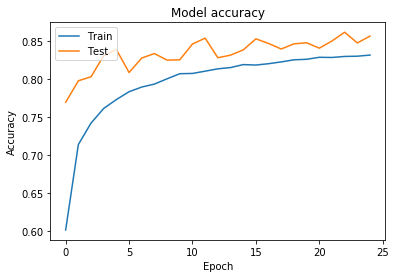

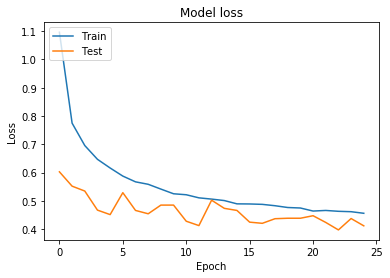

In [52]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

###  Report the final train and validation accuracy

In [55]:
evals = model1.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.4117 - acc: 0.8571


In [69]:
print("Training Accuracy : {} %".format(history.history['acc'][10] *100))
print("Validation Accuracy : {} %".format(evals[1] * 100))

Training Accuracy : 80.79000115394592 %
Validation Accuracy : 85.71000099182129 %


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [71]:
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
x_train = x_train/255

In [0]:
data_gen = ImageDataGenerator(
    rotation_range=75,
    height_shift_range=[1.,2.,3.,4.,5.,6.,7.,8.,9.],
    width_shift_range=[1.,2.,3.,4.,5.,6.,7.,8.,9.],
    horizontal_flip=True,
)

### **Prepare/fit the generator.**

In [0]:
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

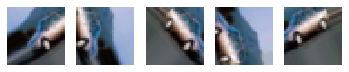

In [88]:
from matplotlib import pyplot as plt
gen = data_gen.flow(x_train[4:5], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()